## eda

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
test_df=pd.read_csv('test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [5]:
train_df.head(5)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


수치형 변수  
revenue1~  

범주형 변수  
sido, sgg, instkind

In [6]:
train_df.set_index('inst_id',inplace=True)

In [7]:
train_df['openDate']=pd.to_datetime(train_df['openDate'])

In [8]:
train_df['OC']=train_df['OC'].replace('open',1)
train_df['OC']=train_df['OC'].replace(' close',0)

In [7]:
#!pip3 install plotly --upgrade

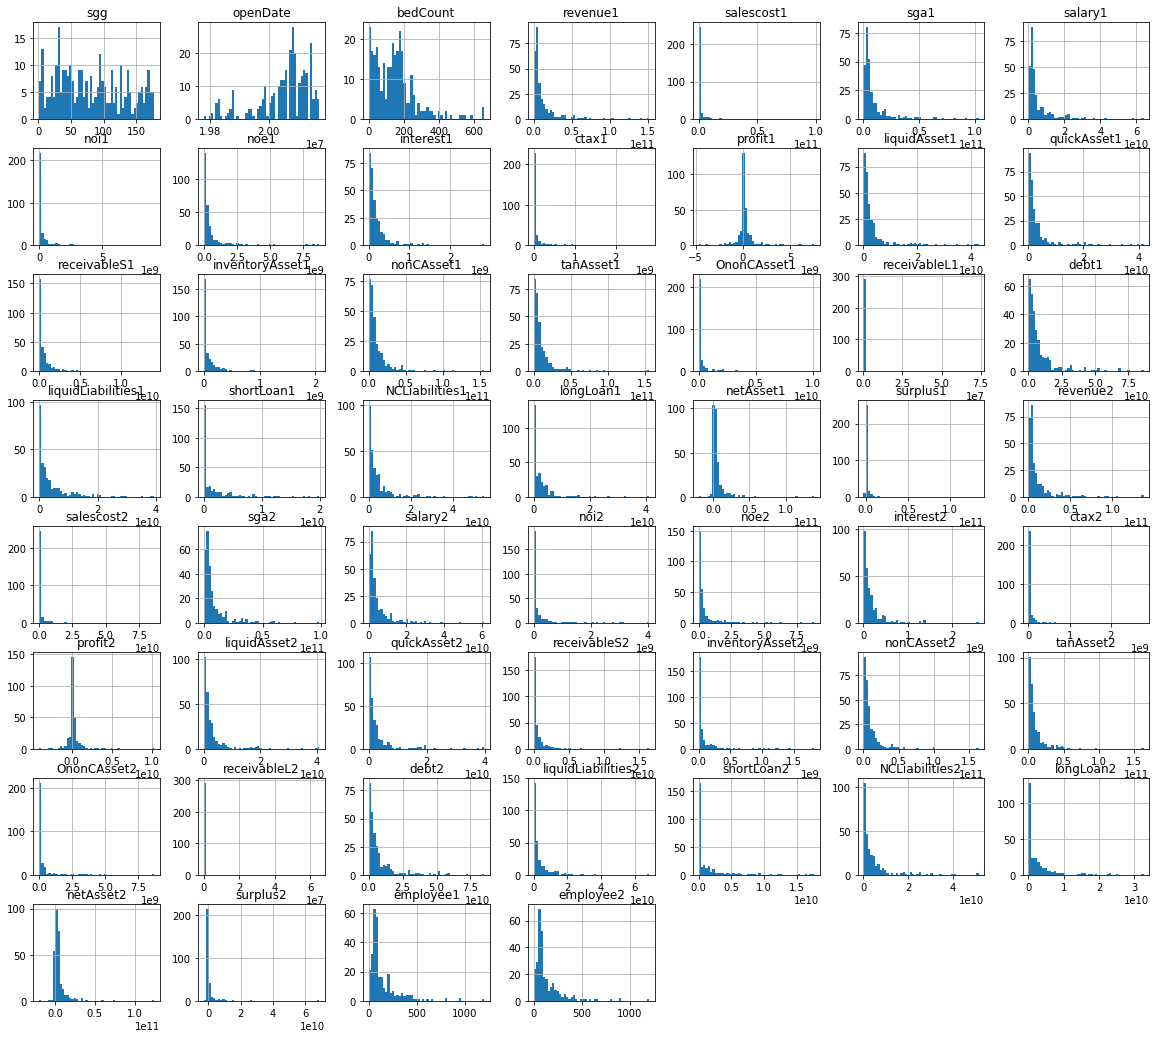

In [26]:
_ = train_df.hist(bins=50, figsize=(20, 18))

로그변환?

C:\Users\ynjn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ynjn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ynjn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ynjn\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



ValueError: not enough values to unpack (expected 2, got 0)

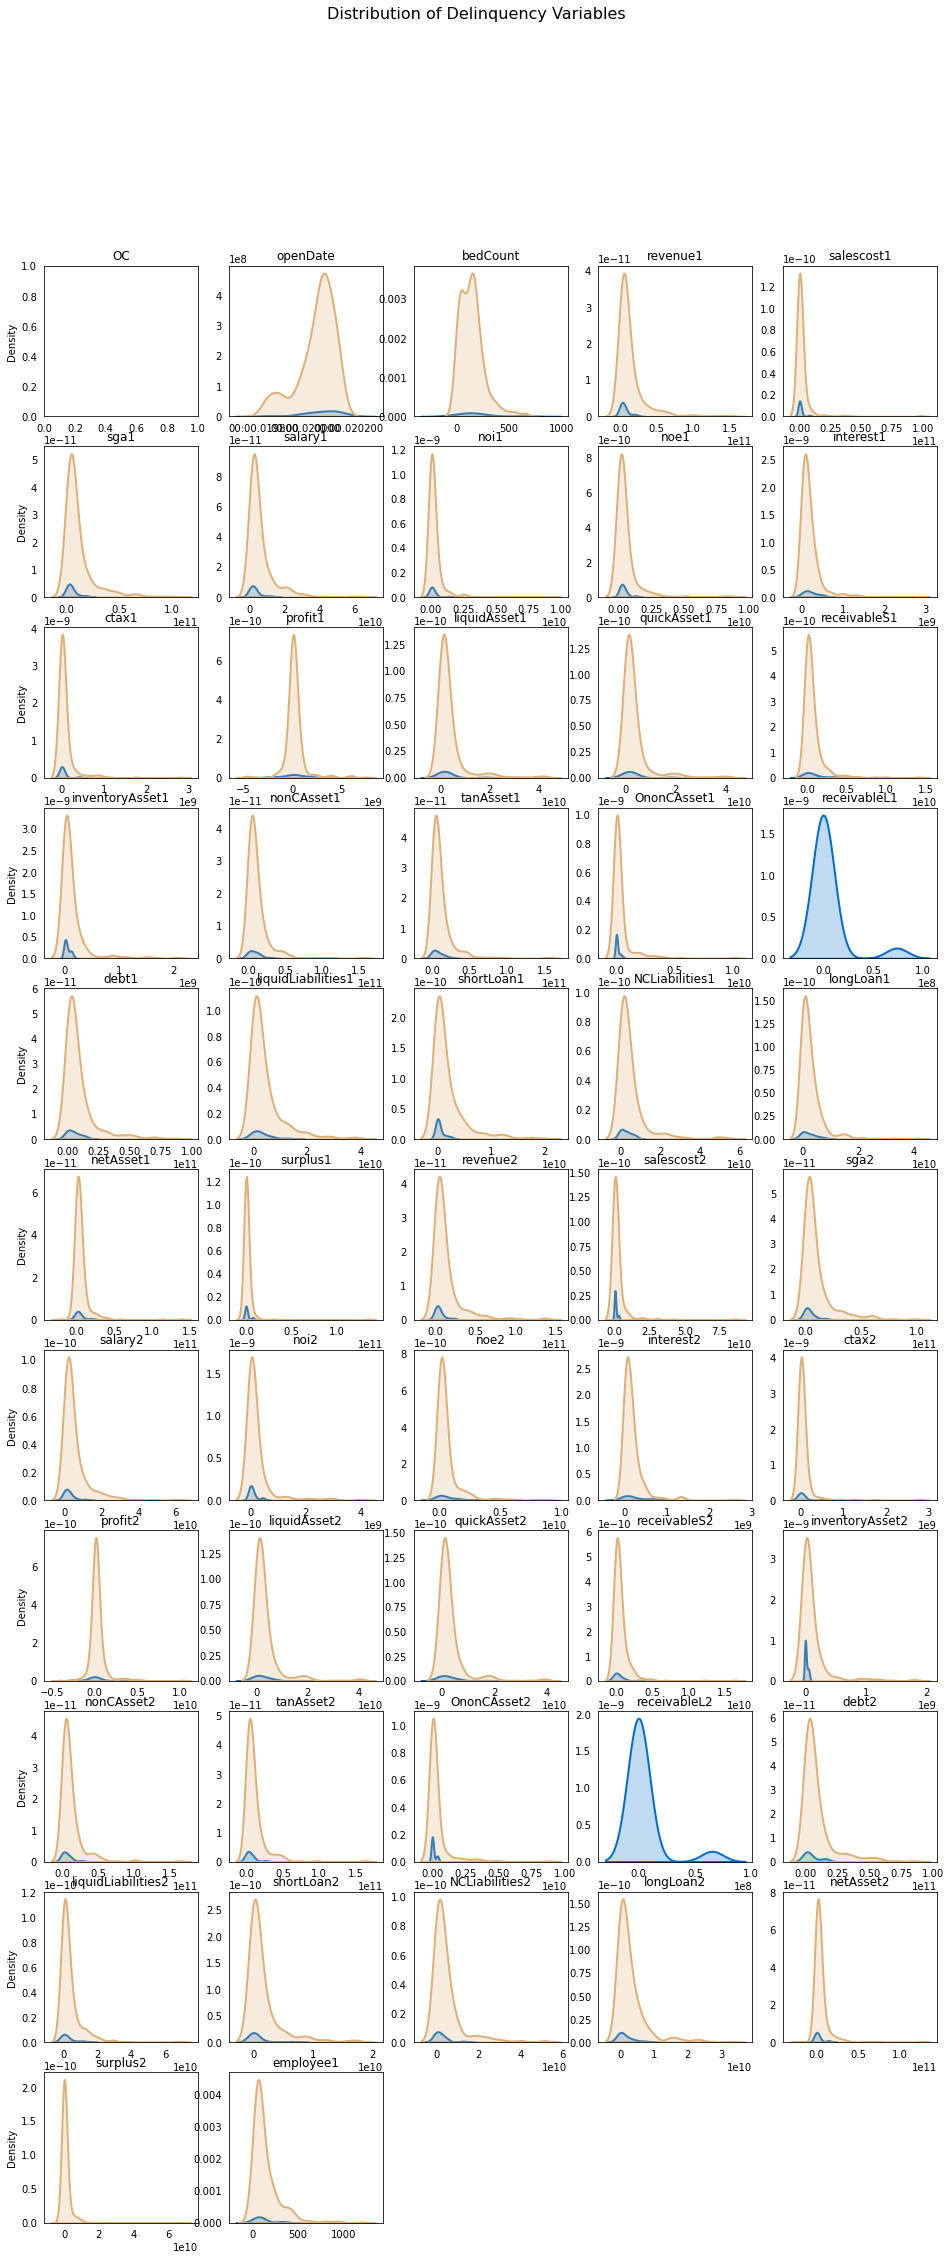

In [50]:
cols=[col for col in train_df.columns if (col not in cat_cols[:-1])]
plot_df=train_df[cols]
fig, ax = plt.subplots(11,5, figsize=(16,36))
fig.suptitle('Distribution of Delinquency Variables',fontsize=16)
row=0
col=[0,1,2,3,4]*11
for i, column in enumerate(plot_df.columns[:-1]):
    if (i!=0)&(i%5==0):
        row+=1
    sns.kdeplot(x=column, hue='OC', palette=pal[::-1], hue_order=[1,0], 
                label=['open','close'], data=plot_df, 
                fill=True, linewidth=2, legend=False, ax=ax[row,col[i]])
    ax[row,col[i]].tick_params(left=False,bottom=False)
    ax[row,col[i]].set(title='\n\n{}'.format(column), xlabel='', ylabel=('Density' if i%5==0 else ''))
for i in range(2,5):
    ax[10,i].set_visible(False)
handles, _ = ax[0,0].get_legend_handles_labels() 
fig.legend(labels=['open','close'], handles=reversed(handles), ncol=2, bbox_to_anchor=(0.18, 0.983))
sns.despine(bottom=True, trim=True)
plt.tight_layout(rect=[0, 0.2, 1, 0.99])

C:\Users\ynjn\AppData\Local\Temp/ipykernel_11740/2188023036.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



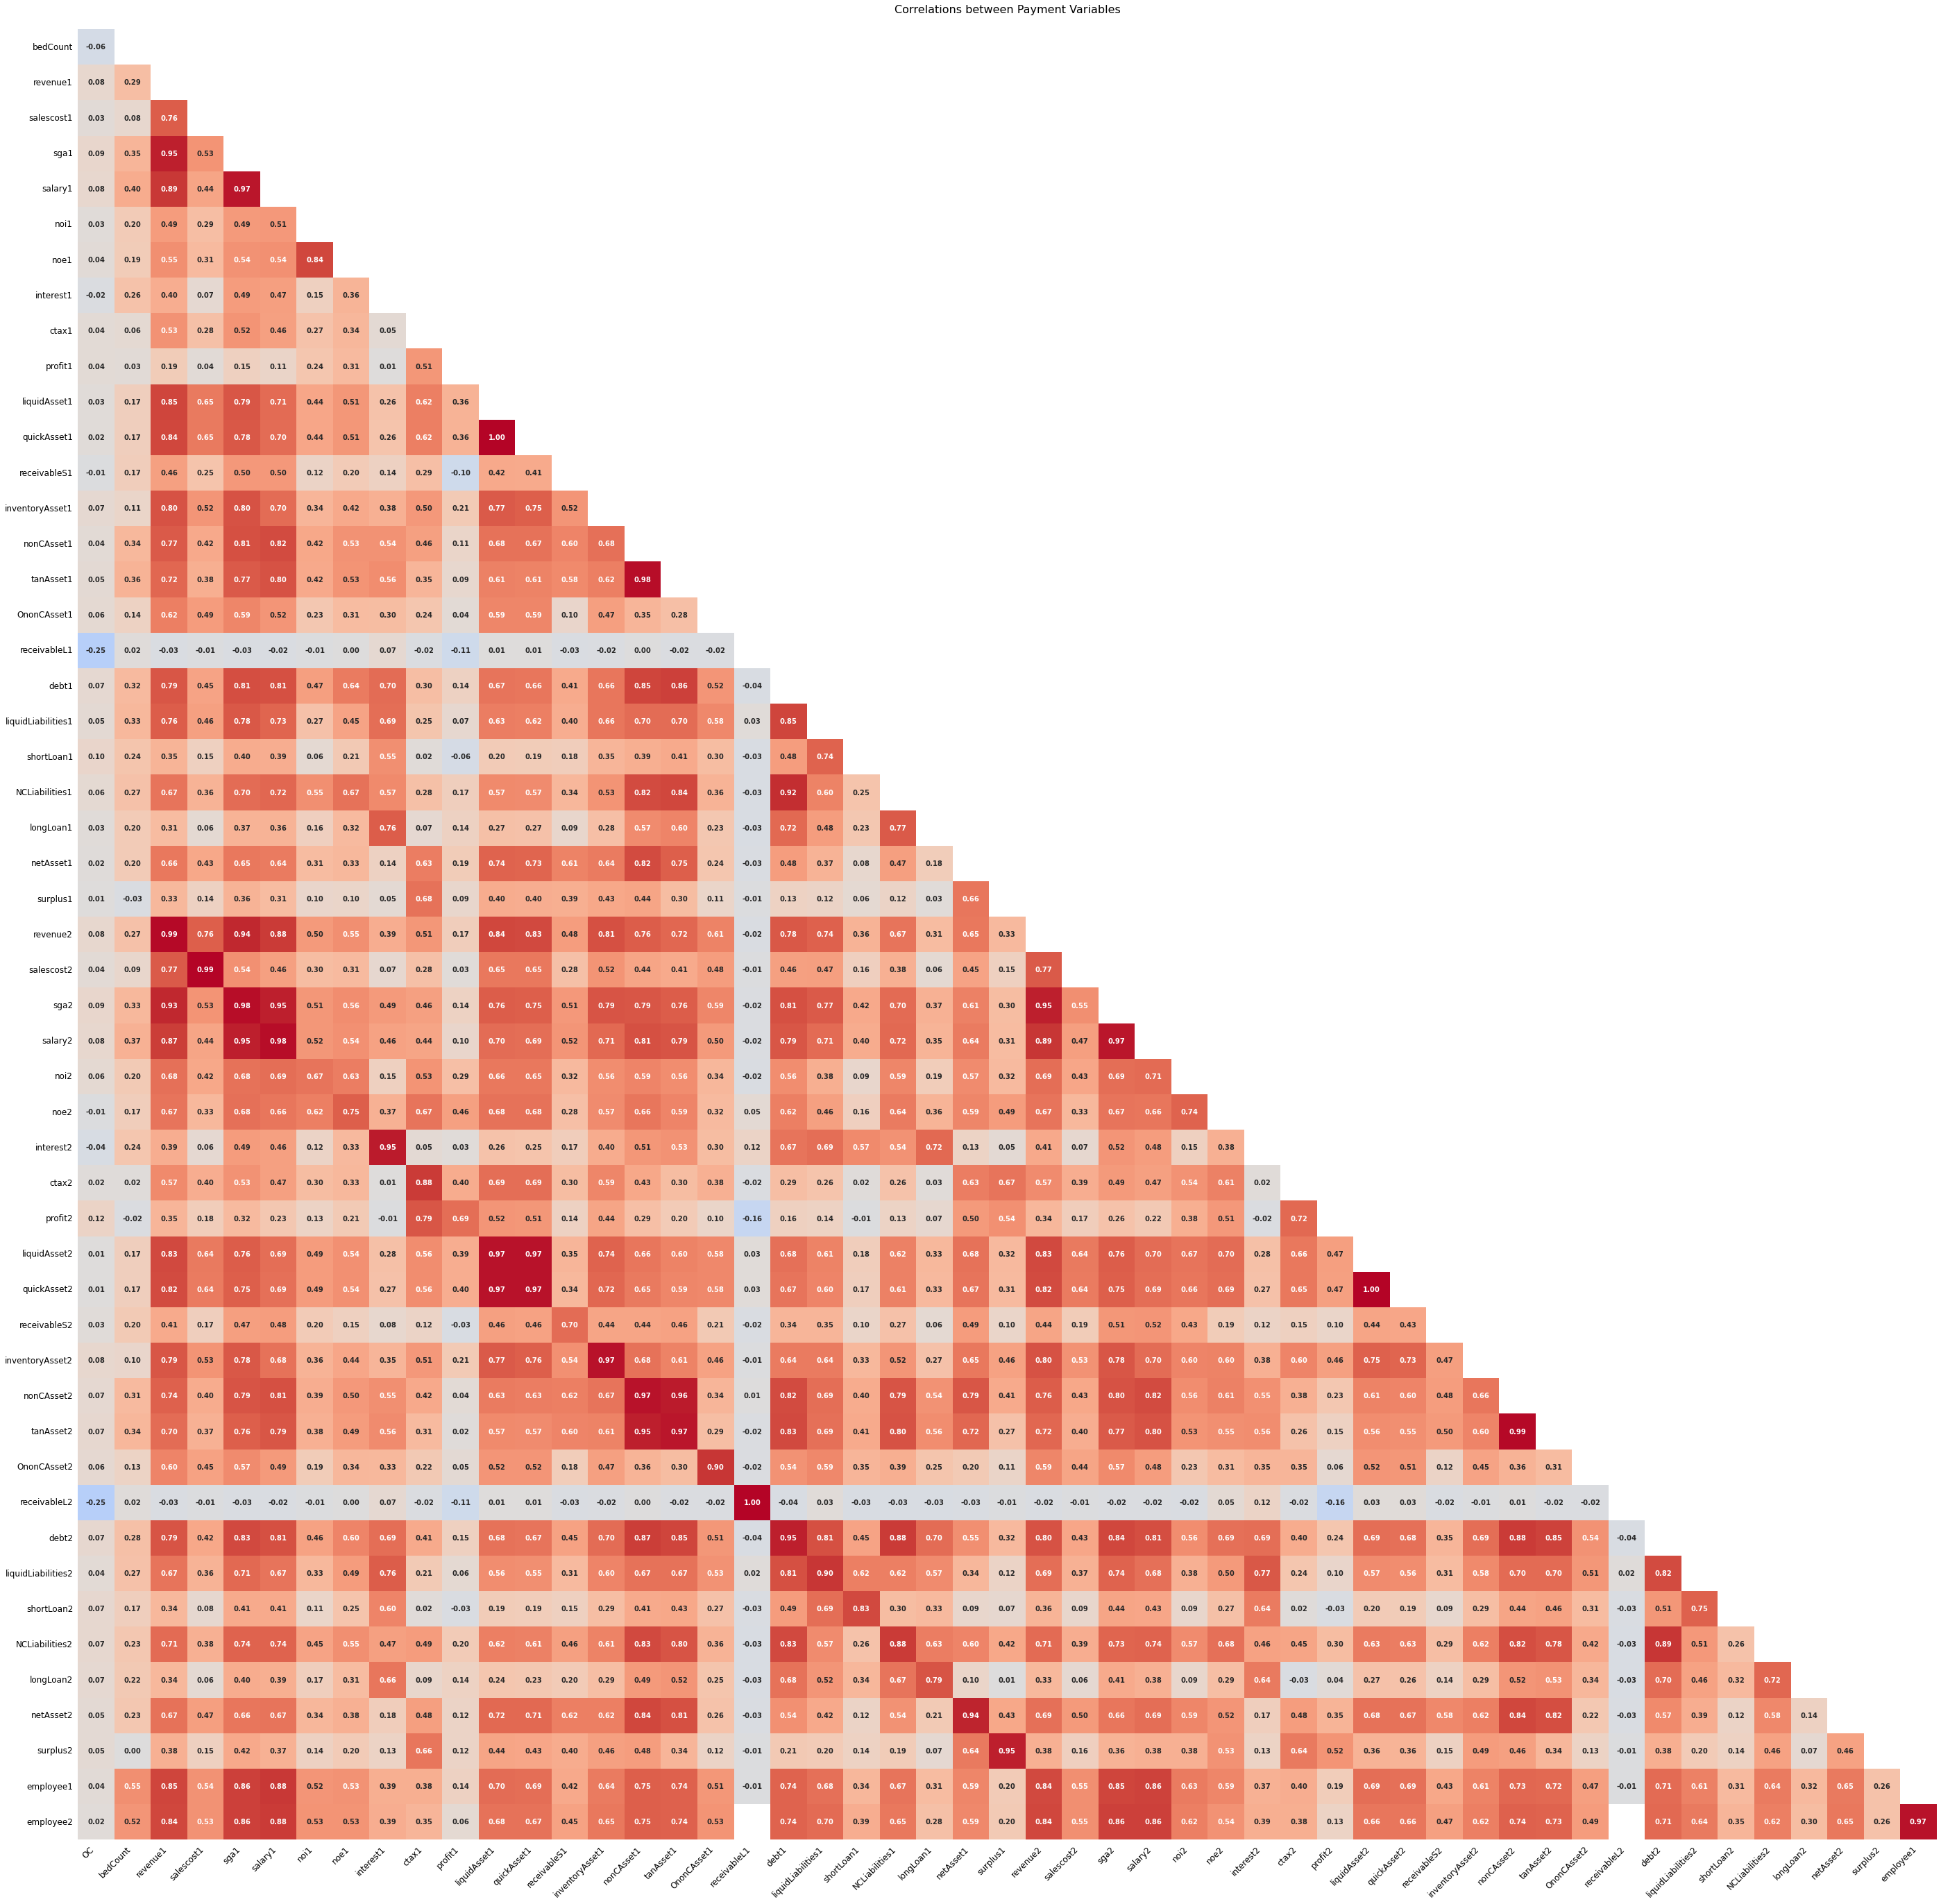

In [43]:
cols=[col for col in train_df.columns if (col not in cat_cols[:-1])]
plot_df=train_df[cols]

corr=plot_df.iloc[:,:-1].corr()
mask=np.triu(np.ones_like(corr, dtype=bool))[1:,:-1]
corr=corr.iloc[1:,:-1].copy()
fig, ax = plt.subplots(figsize=(48,48))   
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', 
            cmap='coolwarm', annot_kws={'fontsize':10,'fontweight':'bold'}, cbar=False)
ax.tick_params(left=False,bottom=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Correlations between Payment Variables\n', fontsize=16)
fig.show()

In [17]:
corr=train_df.corr()
corr=corr['OC'].sort_values(ascending=False)[1:-1]
pal=sns.color_palette("Reds_r",135).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig = go.Figure()
fig.add_trace(go.Bar(x=corr[corr>=0], y=corr[corr>=0].index, 
                     marker_color=rgb, orientation='h', 
                     marker_line=dict(color=pal,width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
pal=sns.color_palette("Blues",100).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig.add_trace(go.Bar(x=corr[corr<0], y=corr[corr<0].index, 
                     marker_color=rgb[25:], orientation='h', 
                     marker_line=dict(color=pal[25:],width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
fig.update_layout(template=temp,title="Feature Correlations with OC",
                  xaxis_title="Correlation", margin=dict(l=150),
                  height=1000, width=700, hovermode='closest')
fig.show()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.graph_objects as go

pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))

In [14]:
from plotly.subplots import make_subplots

cat_cols=['sido','sgg','instkind','ownerChange','OC']

fig = make_subplots(rows=4, cols=1, 
                    subplot_titles=cat_cols[:-1], 
                    vertical_spacing=0.1)
row=0
c=[1]*5
plot_df=train_df[cat_cols]
for i,col in enumerate(cat_cols[:-1]):
    row+=1
    plot_df[col]=plot_df[col].astype(object)
    df=plot_df.groupby(col)['OC'].value_counts().rename('count').reset_index().replace('',np.nan)
    
    fig.add_trace(go.Bar(x=df[df.OC==1][col], y=df[df.OC==1]['count'],
                         marker_color=rgb[1], marker_line=dict(color=pal[1],width=2), 
                         hovertemplate='Value %{x} Frequency = %{y}',
                         name='open', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    fig.add_trace(go.Bar(x=df[df.OC==0][col], y=df[df.OC==0]['count'],
                         marker_color=rgb[0], marker_line=dict(color=pal[0],width=2),
                         hovertemplate='Value %{x} Frequency = %{y}',
                         name='close', showlegend=(True if i==0 else False)),
                  row=row, col=c[i])
    if i%3==0:
        fig.update_yaxes(title='Frequency',row=row,col=c[i])
fig.update_layout(template=temp,title="Distribution of Categorical Variables",
                  legend=dict(orientation="h",yanchor="bottom",y=1.03,xanchor="right",x=0.2),
                  barmode='group',height=1500,width=900)
fig.show()


C:\Users\ynjn\AppData\Local\Temp/ipykernel_1992/2200431511.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
import missingno as msno

<AxesSubplot:>

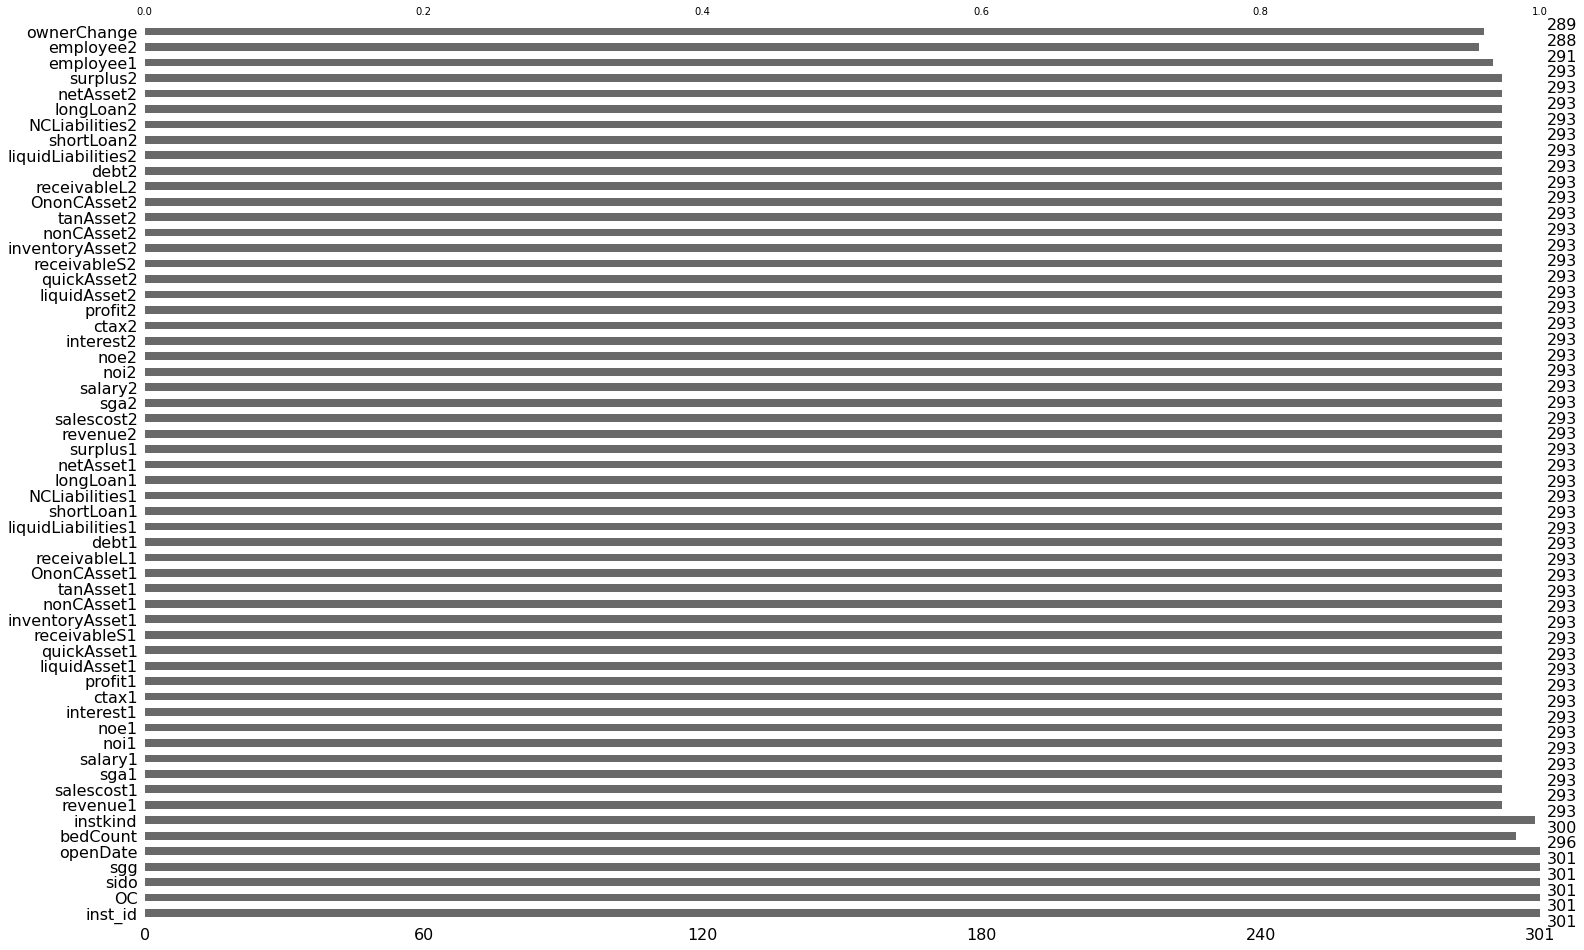

In [9]:
msno.bar(train_df)

<AxesSubplot:>

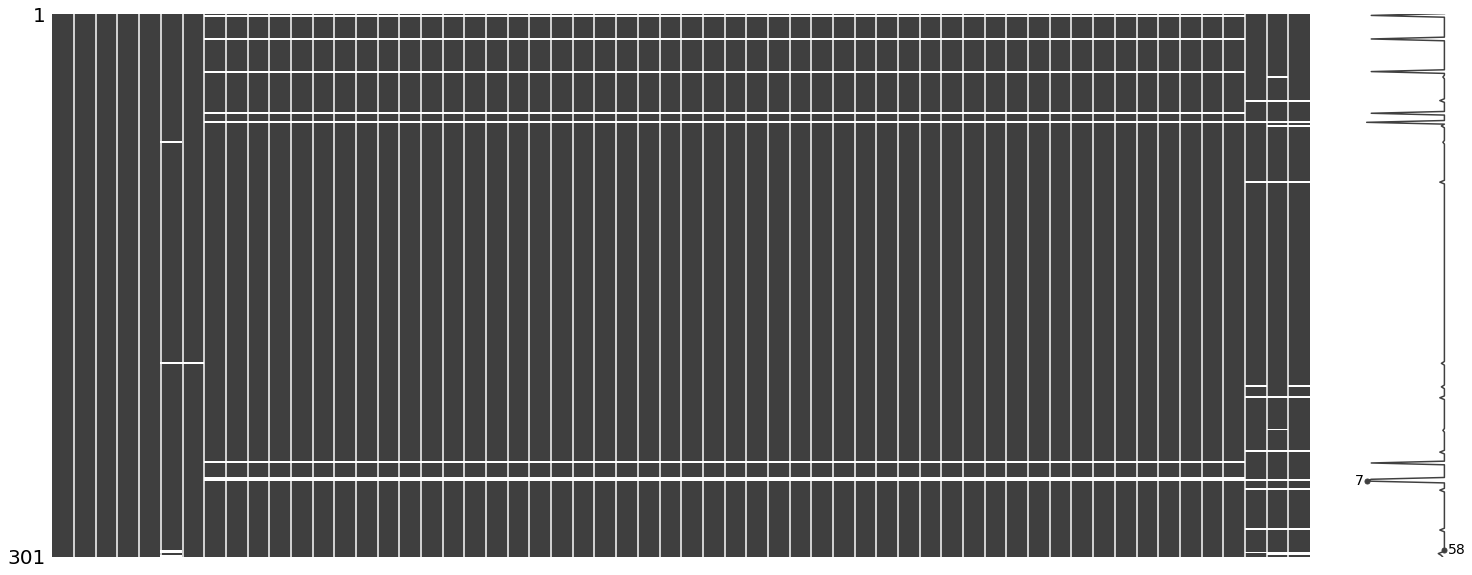

In [10]:
msno.matrix(train_df)

결측치가 일부 병원에 국한되어 존재함을 확인할 수 있다.

In [20]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['revenue1'].isnull()])

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
14,26,open,ulsan,127,20160531,237.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,901.0,same
32,55,open,incheon,141,19930708,232.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,323.0,same
55,87,open,gyeonggi,120,20130314,327.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,203.0,same
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,353,open,gyeonggi,81,20040303,255.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,244.0,same
257,362,open,choongnam,94,19861212,50.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,89.0,same
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


제거하는 게 나을 것 같음.

In [166]:
train_df=train_df.dropna(subset=['revenue1'])
train_df

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,
1,1,choongnam,73,1970-01-01 00:00:00.020071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.000000,same
4,1,gyeonggi,89,1970-01-01 00:00:00.020161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.000000,same
7,1,incheon,141,1970-01-01 00:00:00.020000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.000000,same
9,1,gyeongnam,32,1970-01-01 00:00:00.020050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.000000,same
11,1,gyeongnam,155,1970-01-01 00:00:00.020020501,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,...,0.000000e+00,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.000000,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,1,jeonnam,178,1970-01-01 00:00:00.020050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.000000,same
423,0,choongnam,159,1970-01-01 00:00:00.020140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.000000,same
426,0,gyeongbuk,107,1970-01-01 00:00:00.019830705,72.5,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,88.0,84.572917,NaN


In [119]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee1'].isnull()])

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74,1,seoul,1,1970-01-01 00:00:00.019940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
94,1,gangwon,128,1970-01-01 00:00:00.020031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,0,gyeongbuk,114,1970-01-01 00:00:00.020070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
298,1,gyeongnam,32,1970-01-01 00:00:00.020170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,1596568.0,8.306566e+07,83065655.0,0.0,-6.829984e+08,4.237100e+08,3.662513e+08,1.826044e+08,57458700.0,6.990698e+09,6.972698e+09,8000000.0,0.0,3.478121e+09,6.481208e+08,0.000000e+00,2.830000e+09,2.830000e+09,3.936287e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
306,0,jeonnam,33,1970-01-01 00:00:00.019990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
345,1,busan,69,1970-01-01 00:00:00.020170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.9

In [21]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee2'].isnull()])

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,59924069.0,4.287212e+08,284069476.0,0.0,1.181879e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.093132e+09,1.428541e+08,1.751390e+09,9.164822e+08,21947086.0,1.472983e+08,113100675.0,0.0,7.353718e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,7534205.0,5.263060e+07,52630597.0,0.0,-3.801011e+08,6.073662e+08,5.953914e+08,1.015000e+06,11974763.0,3.629704e+09,3.629704e+09,0.0,0.0,3.513950e+09,3.342069e+09,2.918153e+09,1.718817e+08,1.718817e+08,7.231197e+08,723119742.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,NaN,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
230,327,open,jeonnam,53,19990309,340.0,general_hospital,2.115853e+08,0.0

bedcount와 비례할 것이라고 생각. => 히트맵 상관계수 확인

In [22]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['bedCount'].isnull()])

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,56630198.0,228194537.0,113598011.0,22221340.0,2.653634e+08,1.970952e+09,1.963787e+09,0.000000e+00,7165400.0,3.553691e+09,2.749986e+09,527179060.0,0.0,2.803885e+09,2.793826e+09,2.590000e+09,1.005862e+07,0.000000e+00,2.720758e+09,0.000000e+00,3.318141e+09,1.443104e+08,2.982098e+09,1.709276e+09,58244152.0,164510269.0,91316429.0,13350570.0,72115788.0,1.694659e+09,1.686307e+09,0.000000e+00,8351300.0,3.451466e+09,2.778451e+09,410506320.0,0.0,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
193,281,close,gyeonggi,12,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,13451554.0,90129732.0,4239523.0,0.0,-2.611308e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.342966e+08,6.435569e+07,8.693647e+08,6.757184e+08,1333.0,24317070.0,5929772.0,0.0,-423739612.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.0,15.0,change
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,139851326.0,129697525.0,0.0,-1.622521e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,137980960.0,137980960.0,0.0,-7.175308e+07,3.867238e+09,3.867238e+09,1.132312e+09,0.0,5.569636e+09,5.419756e+09,67957340.0,0.0,6.249466e+09,2.050342e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,133064432.0,107972617.0,0.0,-151827207.0,4.074622e+09,4.069797e+09,1.132312e+09,4825310.0,5.554636e+09,5.419756e+09,52957340.0,0.0,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,2264007.0,73558495.0,73558495.0,0.0,-4.550929e+07,6.624176e+08,6.197801e+08,1.545963e+07,42637474.0,1.024680e+10,1.011968e+10,86930500.0,0.0,5.418547e+09,3.187619e+09,0.000000e+00,2.230928e+09,2.190000e+09,5.490668e+09,6.269440e+09,1.499012e+09,8.328015e+08,5.254614e+08,1.333380e+08,4301929.0,94393907.0,94355280.0,0.0,50657033.0,4.969613e+08,4.526867e+08,1.545534e+07,44274527.0,1.038822e+10,1.026110e+10,86930500.0,0.0,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


instkind에 따라 값을 넣을 수 있을 듯

In [78]:
train_df.groupby(['instkind'], as_index=False).mean()

,instkind,OC,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,clinic,0.941176,70.823529,4.705882,1.731472e+10,8.583306e+09,8.105966e+09,2.449067e+09,1.189285e+08,3.239615e+08,...,0.00000,5.049525e+09,3.232806e+09,3.569523e+08,1.816954e+09,5.502820e+08,4.286052e+09,4.861047e+07,84.764706,79.823529
1,dental_clinic,1.000000,79.000000,0.000000,1.547254e+10,9.405841e+09,5.046173e+09,2.268689e+09,4.249180e+07,4.037885e+08,...,0.00000,1.285480e+10,5.736049e+09,2.361425e+09,7.118755e+09,7.118755e+09,5.762838e+09,0.000000e+00,107.000000,109.000000
2,general_hospital,0.969697,79.909091,258.909091,4.170918e+10,6.750030e+09,3.398514e+10,1.911097e+10,9.978520e+08,1.572786e+09,...,0.00000,2.592392e+10,1.347826e+10,4.876339e+09,1.310873e+10,6.603691e+09,1.432061e+10,2.928745e+09,384.848485,363.406250
3,hospital,0.943182,85.556818,96.220930,1.337522e+10,1.689237e+09,1.106549e+10,5.919029e+09,2.755625e+08,5.214190e+08,...,0.00000,8.798040e+09,3.610770e+09,1.571968e+09,5.187270e+09,2.749322e+09,5.643912e+09,1.507765e+09,125.488095,116.011905
4,nursing_hospital,0.964539,80.595745,171.602837,6.041756e+09,3.636339e+08,5.295087e+09,3.100140e+09,1.371965e+08,3.117662e+08,...,462711.41844,4.400253e+09,2.019527e+09,8.455856e+08,2.611616e+09,2.162679e+09,3.329073e+09,3.568098e+08,97.122302,92.985401
5,traditional_clinic,0.750000,72.750000,0.000000,6.754148e+09,2.237112e+09,4.054628e+09,2.156873e+09,3.878730e+07,1.833580e+08,...,0.00000,2.239842e+09,1.941674e+09,1.673530e+09,2.981682e+08,2.489733e+08,1.789604e+09,0.000000e+00,79.666667,77.333333
6,traditional_hospital,0.875000,57.375000,46.666667,3.987219e+09,4.246709e+08,3.248859e+09,1.901750e+09,3.012980e+07,1.768097e+08,...,0.00000,3.622129e+09,1.925861e+09,1.105142e+09,1.696268e+09,1.469320e+09,2.603800e+09,7.836800e+08,45.000000,41.000000


In [79]:
train_df.groupby(['instkind'], as_index=False).median()

,instkind,OC,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
0,clinic,1.0,68.0,0.0,1.889868e+09,1.128316e+08,1.694670e+09,1.077318e+09,8067090.0,6.395641e+07,...,0.0,1.035994e+09,3.075474e+08,0.000000e+00,4.136694e+08,0.000000e+00,1.501697e+09,0.0,21.0,23.0
1,dental_clinic,1.0,79.0,0.0,1.547254e+10,9.405841e+09,5.046173e+09,2.268689e+09,42491802.0,4.037885e+08,...,0.0,1.285480e+10,5.736049e+09,2.361425e+09,7.118755e+09,7.118755e+09,5.762838e+09,0.0,107.0,109.0
2,general_hospital,1.0,80.0,243.0,3.757680e+10,9.454929e+08,3.221424e+10,1.888037e+10,460491652.0,1.041125e+09,...,0.0,1.964203e+10,1.121965e+10,2.400000e+09,9.696344e+09,3.400000e+09,6.952726e+09,0.0,350.0,297.5
3,hospital,1.0,81.5,72.5,7.643509e+09,5.905625e+08,6.634247e+09,3.590837e+09,71840820.5,2.163937e+08,...,0.0,5.351156e+09,2.023401e+09,4.280197e+08,2.872102e+09,8.925000e+08,3.276813e+09,0.0,90.0,89.5
4,nursing_hospital,1.0,67.0,153.0,4.629582e+09,1.524130e+08,4.062515e+09,2.383593e+09,24905355.0,1.503066e+08,...,0.0,2.906964e+09,9.259501e+08,2.900000e+07,1.750000e+09,1.490268e+09,2.619290e+09,0.0,73.0,73.0
5,traditional_clinic,1.0,82.5,0.0,6.562301e+09,1.588749e+09,2.974649e+09,1.478181e+09,35362079.0,2.081542e+08,...,0.0,1.234137e+09,6.503005e+08,4.648375e+08,1.268500e+07,0.000000e+00,1.351891e+09,0.0,79.0,70.0
6,traditional_hospital,1.0,53.0,44.0,2.584781e+09,1.607632e+08,2.131862e+09,1.293032e+09,11663438.5,1.951300e+08,...,0.0,3.850045e+09,1.662234e+09,1.636618e+08,8.888255e+08,0.000000e+00,2.587050e+09,0.0,42.0,33.0


In [140]:
train_df.loc[426,'bedCount']=72.5

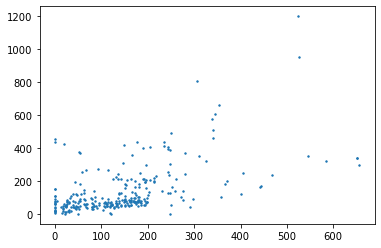

In [75]:
plt.scatter(train_df['bedCount'],train_df['employee1'], s=2)
plt.show()

In [126]:
with pd.option_context("display.max_columns", 100):
    display(train_df[train_df['employee1'].isnull()])

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
74,1,seoul,1,1970-01-01 00:00:00.019940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,19153521.0,2.160889e+08,204479315.0,72446781.0,0.000000e+00,1.302115e+09,1.186743e+09,2.671059e+06,97648359.0,8.347311e+09,8.178953e+09,2200500.0,0.0,6.749132e+09,5.759132e+09,4.000000e+09,9.900000e+08,9.900000e+08,2.900294e+09,0.0,8.632333e+09,8.994174e+08,7.616309e+09,4.283771e+09,132492468.0,2.188810e+08,199357358.0,30218421.0,0.000000e+00,1.002794e+09,8.915144e+08,0.000000e+00,80868500.0,8.581435e+09,8.368729e+09,25520500.0,0.0,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,NaN,NaN,NaN
94,1,gangwon,128,1970-01-01 00:00:00.020031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,0,gyeongbuk,114,1970-01-01 00:00:00.020070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,23843435.0,1.288886e+08,128638631.0,11620200.0,9.465001e+07,2.851343e+09,2.734711e+09,1.085357e+09,116632010.0,5.453158e+09,5.438850e+09,0.0,0.0,4.457667e+09,1.864667e+09,1.750000e+09,2.590000e+09,2.590000e+09,3.846834e+09,0.0,5.073663e+09,0.000000e+00,4.984086e+09,3.060034e+09,40391187.0,1.292911e+08,128791122.0,10915720.0,-1.023856e+07,1.181463e+09,1.161359e+09,8.314617e+08,20103590.0,5.304341e+09,5.290033e+09,0.0,0.0,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
298,1,gyeongnam,32,1970-01-01 00:00:00.020170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,1596568.0,8.306566e+07,83065655.0,0.0,-6.829984e+08,4.237100e+08,3.662513e+08,1.826044e+08,57458700.0,6.990698e+09,6.972698e+09,8000000.0,0.0,3.478121e+09,6.481208e+08,0.000000e+00,2.830000e+09,2.830000e+09,3.936287e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,NaN,103.0,NaN
306,0,jeonnam,33,1970-01-01 00:00:00.019990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,417949094.0,415894516.0,1.692204e+09,1.829292e+10,1.818429e+10,3.728960e+09,108635115.0,1.307623e+10,1.265639e+10,312415620.0,0.0,1.582736e+10,1.285973e+10,0.000000e+00,2.967635e+09,0.000000e+00,1.554179e+10,0.0,2.239509e+10,8.492085e+08,1.805503e+10,1.138885e+10,483447584.0,1.574478e+09,571079590.0,553752070.0,1.846078e+09,1.708819e+10,1.701879e+10,3.084699e+09,69397471.0,1.239357e+10,1.173006e+10,310415620.0,0.0,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
345,1,busan,69,1970-01-01 00:00:00.020170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,8067090.0,2.748281e+06,1364824.0,18640111.0,1.092933e+08,1.332665e+09,1.331507e+09,6.243635e+07,0.0,7.721058e+08,5.021058e+08,270000000.0,0.0,9.528087e+07,9.491087e+07,0.000000e+00,3.700000e+05,0.000000e+00,2.009490e+09,0.0,7.745608e+08,0.000000e+00,7.560969e+08,3.638300e+08,15339220.0,4.402666e+06,617047.0,8050806.0,2.134966e+07,1.172968e+09,1.171014e+09,4.916044e+07,0.0,7.968085e+08,5.268085e+08,270000000.0,0.0,6.9

In [141]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()


#X and y after excluding missing values
train=train_df.dropna(subset=['employee2'])
X = train.dropna(axis=0)[['employee2']]
y = train.dropna(axis=0)['employee1'] 


#fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, y)

In [142]:
lin_reg = linear_model.LinearRegression()


# X and y after excluding missing values
train=train_df.dropna(subset=['bedCount'])
X = train.dropna(axis=0)[['bedCount']]
y = train.dropna(axis=0)['employee1'] 


# fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, y)

In [143]:
train[train['bedCount'].isnull()]

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,


In [144]:
y_pred = lin_reg_model.predict(train.loc[:, ['bedCount']])

y_pred

array([158.14667812, 318.39011684, 357.93956129, 279.52255936,
       172.46630456, 204.5149923 , 184.0583831 , 209.28820111,
       229.74481031,  76.32024132, 209.28820111, 486.13431227,
       122.6885555 , 136.32629497, 200.42367046, 397.48900574,
       162.23799996, 204.5149923 , 237.24556702, 171.78441758,
       152.69158233, 274.74935055,  71.54703251, 210.65197506,
        83.82099803, 172.46630456, 132.23497313,  81.77533711,
       140.41761681, 315.66256895,  38.81645779,  92.00364171,
       197.01423559, 437.03845019, 107.68704209, 128.82553826,
       214.7432969 ,  74.95646737, 150.64592141,  38.81645779,
       179.28517429, 124.73421642, 177.23951337, 205.19687927,
       133.59874708, 172.46630456, 227.69914939, 152.00969536,
        57.90929304, 208.60631414, 174.51196548,  77.68401527,
       139.73572984, 116.55157275, 184.74027007, 261.79349806,
       160.19233904, 162.23799996,  68.81948461,  38.81645779,
       205.19687927, 101.55005933, 126.09799037,  72.91

In [151]:
train['employee1'] = np.where(train['employee1'].isnull(), 
                              pd.Series(y_pred.flatten()), 
                              train['employee1'])
train.loc[[74,94,140,298,306,345,363,369,407,426]]

C:\Users\ynjn\AppData\Local\Temp/ipykernel_11740/1197799052.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,
74,1,seoul,1,1970-01-01 00:00:00.019940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,128.825538,NaN,NaN
94,1,gangwon,128,1970-01-01 00:00:00.020031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.964034,NaN,NaN
140,0,gyeongbuk,114,1970-01-01 00:00:00.020070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,141.781391,NaN,NaN
298,1,gyeongnam,32,1970-01-01 00:00:00.020170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,2.659892e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,147.918374,103.0,NaN
306,0,jeonnam,33,1970-01-01 00:00:00.019990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,83.820998,NaN,NaN
345,1,busan,69,1970-01-01 00:00:00.020170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,38.816458,NaN,NaN
363,1,gyeongbuk,95,1970-01-01 00:00:00.020141219,0.0,clinic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.816458,NaN,NaN
369,1,gangwon,100,1970-01-01 00:00:00.020020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,1.775322e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,226197450.0,65.410050,NaN,NaN
407,1,gyeongbuk,160,1970-01-01 00:00:00.019881104,119.0,hospital,9.618709e+09,0.000000e+00,9.751211e+09,4.979714e+09,...,4.416916e+09,1.524426e+09,0.000000e+00,2.892490e+09,5.462400e+08,4.902827e+09,0.0,119.961008,NaN,NaN


In [152]:
train_df.loc[74,'employee1']=129
train_df.loc[94,'employee1']=150
train_df.loc[140,'employee1']=142
train_df.loc[298,'employee1']=148
train_df.loc[306,'employee1']=84
train_df.loc[345,'employee1']=39
train_df.loc[363,'employee1']=39
train_df.loc[369,'employee1']=65
train_df.loc[407,'employee1']=120
train_df.loc[426,'employee1']=88

In [160]:
lin_reg = linear_model.LinearRegression()


# X and y after excluding missing values
X = train_df.dropna(axis=0)[['employee1']]
y = train_df.dropna(axis=0)['employee2'] 


# fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, y)

In [161]:
y_pred = lin_reg_model.predict(train_df.loc[:, ['employee1']])

y_pred

array([  60.93251095,  732.8655825 ,  217.32288755,  607.38958267,
        191.86398903,  365.53004677,  205.50268467,  449.18071332,
        225.50610493,  340.98039463,   52.74929357,  274.60540921,
         53.65853994,  194.59172816,  869.25253884,  869.25253884,
        170.95132239,  376.44100327,   42.74758344,  180.95303253,
        327.34169899,  555.56253926,  110.94106161,  153.67564126,
        246.41877157,  146.40167025,  225.50610493,  139.12769925,
        384.62422065,  230.96158318,   89.11914859,   90.02839497,
        298.24581497,  298.24581497,   91.84688772,   50.93080082,
        129.12598912,   86.39140947,   94.57462685,  417.35709018,
        190.95474266,  195.50097453,  123.67051086,  120.03352536,
        113.66880073,  272.78691646,   82.75442396,  124.57975724,
        121.85201811,  277.33314834,   70.93422108,  112.75955436,
         71.84346746,  245.50952519,  187.31775715,  186.40851078,
         50.93080082,  151.85714851,   72.75271383,  102.75784

In [162]:
len(y_pred)

301

In [165]:
train_df['employee2'] = np.where(train_df['employee2'].isnull(), 
                              pd.Series(y_pred.flatten()), 
                              train_df['employee2'])
train_df.loc[[58,74,94,96,140,306,327,345,363,369,407,426,427]]

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,
58,0,gyeonggi,168,1970-01-01 00:00:00.020130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,50.930801,change
74,1,seoul,1,1970-01-01 00:00:00.019940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.0,129.0,121.852018,NaN
94,1,gangwon,128,1970-01-01 00:00:00.020031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,140.946192,NaN
96,1,busan,64,1970-01-01 00:00:00.020170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,38.0,39.110598,NaN
140,0,gyeongbuk,114,1970-01-01 00:00:00.020070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,142.0,133.672221,NaN
306,0,jeonnam,33,1970-01-01 00:00:00.019990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,84.0,80.935931,NaN
327,1,jeonnam,53,1970-01-01 00:00:00.019990309,340.0,general_hospital,2.115853e+08,0.000000e+00,3.794506e+07,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,461.0,423.721815,same
345,1,busan,69,1970-01-01 00:00:00.020170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,3.014000e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.0,39.0,40.019844,NaN
363,1,gyeongbuk,95,1970-01-01 00:00:00.020141219,0.0,clinic,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,40.019844,NaN


In [167]:
lin_reg = linear_model.LinearRegression()


# X and y after excluding missing values
X = train_df.dropna(axis=0)[['employee1']]
y = train_df.dropna(axis=0)['bedCount'] 


# fitting linear regression model using non-missing values
lin_reg_model = lin_reg.fit(X, y)

In [168]:
y_pred = lin_reg_model.predict(train_df.loc[:, ['employee1']])

y_pred

array([111.76948961, 186.86604758, 374.17083463, 174.64102652,
       258.0331345 , 181.19014495, 298.20106086, 190.79551864,
       246.24472133, 107.84001855, 214.37234498, 108.27662645,
       175.9508502 , 499.91390844, 164.59904493, 263.27242924,
       103.0373317 , 169.40173177, 239.6956029 , 349.2841846 ,
       135.78292384, 156.30349492, 200.83750023, 152.81063176,
       190.79551864, 149.3177686 , 267.2019003 , 193.41516601,
       125.30433436, 125.74094225, 225.72415026, 126.61415804,
       106.96680276, 144.51508175, 123.99451067, 127.92398173,
       282.91978453, 174.20441862, 176.3874581 , 141.89543438,
       140.1490028 , 137.09274753, 213.49912919, 122.24807909,
       142.33204227, 141.02221859, 215.68216867, 116.57217646,
       136.65613963, 117.00878435, 200.40089233, 172.45798704,
       106.96680276, 155.43027913, 117.44539225, 131.85345279,
       202.58393181, 101.29090012, 103.91054749, 116.13556856,
       141.02221859, 113.95252908, 306.06000297, 102.16

In [169]:
train_df['bedCount'] = np.where(train_df['bedCount'].isnull(), 
                              pd.Series(y_pred.flatten()), 
                              train_df['bedCount'])
train_df.loc[[107,281,423,426,428]]

C:\Users\ynjn\AppData\Local\Temp/ipykernel_11740/2617963646.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
inst_id,,,,,,,,,,,,,,,,,,,,,
107,0,jeonbuk,26,1970-01-01 00:00:00.019990805,121.811471,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.000000,same
281,0,gyeonggi,12,1970-01-01 00:00:00.020121213,91.248919,NaN,3.054388e+08,2.241614e+07,4.674753e+08,2.548688e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,15.0,15.000000,change
423,0,choongnam,159,1970-01-01 00:00:00.020140618,119.191824,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.000000,same
426,0,gyeongbuk,107,1970-01-01 00:00:00.019830705,72.500000,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,88.0,84.572917,NaN
428,1,seoul,79,1970-01-01 00:00:00.020011017,91.248919,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,...,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.000000,same


<AxesSubplot:>

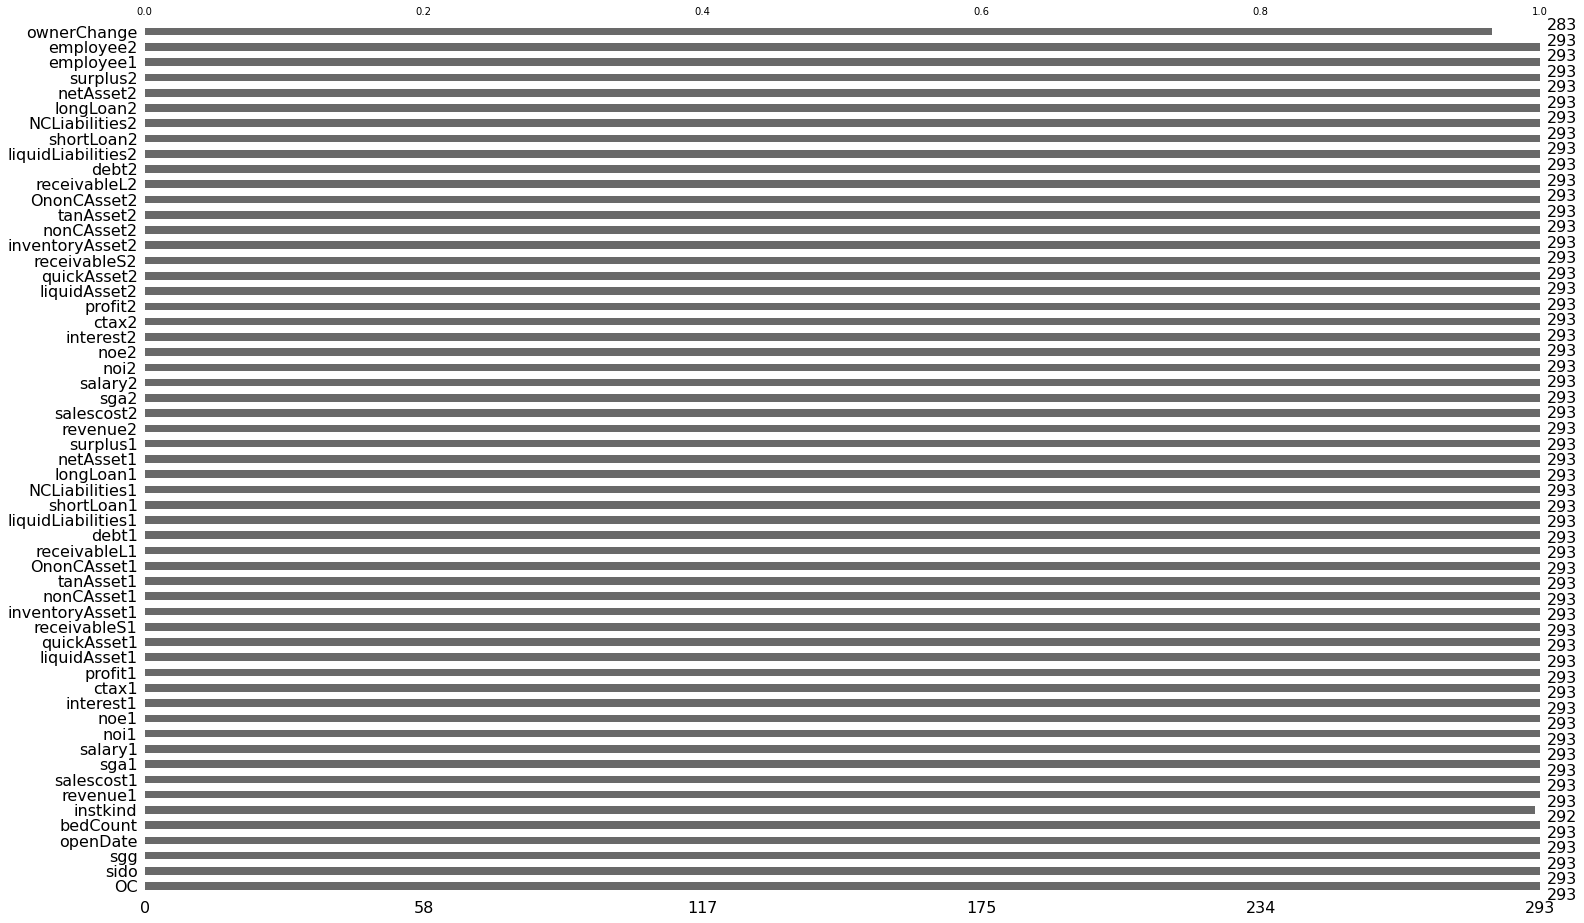

In [172]:
msno.bar(train_df)

In [18]:
train_df['ownerChange'].fillna('same', inplace=True)

In [19]:
train_df['instkind'].fillna('hospital', inplace=True)

ownerChange, instkind 결측치 대체  
-> knn?

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc= OneHotEncoder()

enc.fit(train_df)

In [22]:

cat_cols=['sido','sgg','instkind','ownerChange','OC','']

cols=[col for col in train_df.columns if (col not in cat_cols[:-1])]
train=train_df[cols]

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

lda = LinearDiscriminantAnalysis(n_components=50) # LDA 적용, 50차원으로 줄이기 설정
lda.fit(train, train.OC)
amex_lda = lda.transform(train)

print("BEFORE",train[:10])
print("BEFORE SHAPE",train.shape)

print()

print("AFTER",amex_lda[:10])
print("AFTER SHAPE",amex_lda.shape)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

전처리
- train,valid split
- (결측치 처리)
- 스케일 조정
- 폐업 기준(확률)
- (파생변수(ex. 2016,2017 차이) 생성)
- (시군구 category 변환 + 일부 묶기)
- 오버샘플링
- (차원 축소)